<a href="https://colab.research.google.com/github/DataScientist64/DataAnalysis/blob/main/drugclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
df = pd.read_csv("/content/drug.csv")

In [4]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [6]:
df.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


In [7]:
X = df.drop(columns='Drug', axis=1)
y= df['Drug']

In [8]:
y.value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=42)

In [10]:
num_features = X_train.select_dtypes(include='number').columns.to_list()
cat_features = X_train.select_dtypes(include=['object','category']).columns.to_list()

In [11]:
num_features

['Age', 'Na_to_K']

In [12]:
cat_features

['Sex', 'BP', 'Cholesterol']

In [13]:
num_transformers = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformers = Pipeline(steps=[('one hot', OneHotEncoder())])

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformers,num_features),
        ('cat', cat_transformers, cat_features)
    ]
)

In [15]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Classifier', RandomForestClassifier(random_state=42))
])

In [16]:
param_grid = {
    'Classifier__n_estimators':[50,100,200,300],
    'Classifier__max_depth':[None,10,20,30,40,50],
    'Classifier__min_samples_split':[2,5]
}

In [17]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [18]:
grid_search = GridSearchCV(pipeline,param_grid,cv=cv,verbose=2,scoring='accuracy')

In [19]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.1s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.1s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.1s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.1s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=100; total time=   0.2s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=100; total time=   0.2s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=100; total time=   0.2s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=100; total time=   0.2s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=100; total time=   0.2s
[CV] END Classifier__max_depth=None, Classifier__mi

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Na_to_K']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'BP',
                                                                          'Cholesterol'])])),
                                       ('Classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'Classifier__max_depth': [None, 10, 20, 30, 40, 50],
                         'Classifier__min_samples_split': [2, 5],
                         'Classifier__n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=2)

In [20]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'Classifier__max_depth': None, 'Classifier__min_samples_split': 2, 'Classifier__n_estimators': 50}
0.9666666666666666


In [21]:
y_pred = grid_search.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        59
       drugA       0.73      1.00      0.84        19
       drugB       1.00      0.46      0.63        13
       drugC       1.00      1.00      1.00        10
       drugX       1.00      1.00      1.00        39

    accuracy                           0.95       140
   macro avg       0.95      0.89      0.90       140
weighted avg       0.96      0.95      0.94       140



In [23]:
conf_matrix = confusion_matrix(y_test,y_pred)

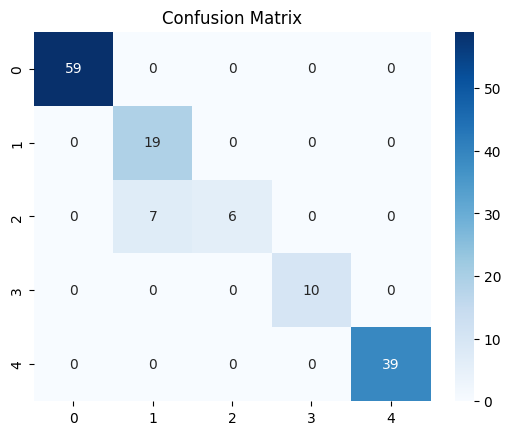

In [24]:
plt.figure()
sns.heatmap(conf_matrix,cmap='Blues',annot=True)
plt.title('Confusion Matrix')
plt.show()

In [25]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Classifier', LogisticRegression(random_state=42))
])

In [26]:
param_grid_lr={
    'Classifier__penalty':['l1','l2'],
    'Classifier__C':[0.01, 0.1, 1, 10, 100],
    'Classifier__solver': ['liblinear', 'saga'],
    'Classifier__class_weight':[None,'balanced'],
    'Classifier__max_iter': [200, 500, 1000]

}

In [27]:
grid_search_lr = GridSearchCV(pipeline_lr,param_grid_lr,cv=cv,scoring='accuracy',verbose=2)

In [28]:
grid_search_lr.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total t

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, C

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=bala

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Cla

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.1s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifie

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=ba

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weig

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weig

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_wei

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_it

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.1s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_it

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_it

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weigh

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Class

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Class

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Class

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.1s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifie

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Na_to_K']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'BP',
                                                                          'Cholesterol'])])),
                                       ('Classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'Classifier__C': [0.01, 0.1, 1, 10, 100],
                         'Classifier__class_weight': [None, 'balanced'],
                         'Classifier__max_iter': [200, 500, 1000],
                         'Classifier__penalty': ['l1', 'l2'],
                         'Classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [29]:
print(grid_search_lr.best_params_)
print(grid_search_lr.best_score_)

{'Classifier__C': 100, 'Classifier__class_weight': None, 'Classifier__max_iter': 1000, 'Classifier__penalty': 'l1', 'Classifier__solver': 'saga'}
0.95


In [30]:
y_pred_lr = grid_search_lr.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

       DrugY       0.97      0.97      0.97        59
       drugA       0.83      1.00      0.90        19
       drugB       1.00      0.62      0.76        13
       drugC       0.83      1.00      0.91        10
       drugX       1.00      0.97      0.99        39

    accuracy                           0.94       140
   macro avg       0.93      0.91      0.91       140
weighted avg       0.95      0.94      0.94       140



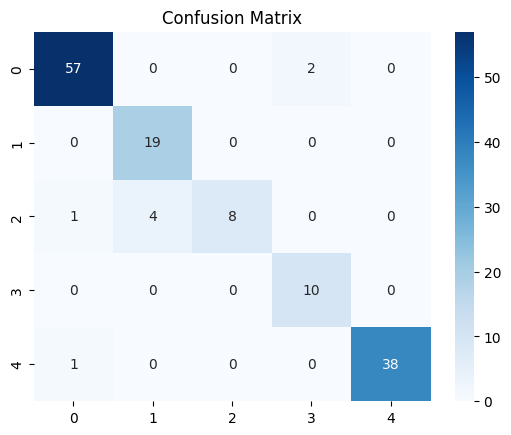

In [32]:
conf_matrix = confusion_matrix(y_test,y_pred_lr)
plt.figure()
sns.heatmap(conf_matrix,cmap='Blues',annot=True)
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Create new data for prediction. Ensure it has the same columns as the training data.
new_data = pd.DataFrame({
    'Age': [30],
    'Sex': ['F'],
    'BP': ['NORMAL'],
    'Cholesterol': ['HIGH'],
    'Na_to_K': [18.5]
})

# Predict with the best RandomForestClassifier model
rf_prediction = grid_search.best_estimator_.predict(new_data)
print(f"RandomForestClassifier predicts: {rf_prediction[0]}")

# Predict with the best LogisticRegression model
lr_prediction = grid_search_lr.best_estimator_.predict(new_data)
print(f"LogisticRegression predicts: {lr_prediction[0]}")

RandomForestClassifier predicts: DrugY
LogisticRegression predicts: DrugY


In [39]:
pipeline_tree = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('Classifier', DecisionTreeClassifier(random_state=42))
])

In [40]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [45]:
param_grid_tree = {
    "Classifier__criterion": ["gini", "entropy", "log_loss"],
    "Classifier__splitter": ["best", "random"],
    "Classifier__max_depth": [None, 5, 10, 20],
    "Classifier__min_samples_split": [2, 5, 10],
    "Classifier__min_samples_leaf": [1, 2, 5],
    "Classifier__max_features": [None, "sqrt", "log2"],
    "Classifier__class_weight": [None, "balanced"]
}

In [46]:
grid_search_tree = GridSearchCV(pipeline_tree,param_grid_tree,cv=cv,verbose=2,scoring='accuracy')

In [47]:
grid_search_tree.fit(X_train,y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END Classifier__class_weight=None, Classifier__criterion=gini, Classifier__max_depth=None, Classifier__max_features=None, Classifier__min_samples_leaf=1, Classifier__min_samples_split=2, Classifier__splitter=best; total time=   0.0s
[CV] END Classifier__class_weight=None, Classifier__criterion=gini, Classifier__max_depth=None, Classifier__max_features=None, Classifier__min_samples_leaf=1, Classifier__min_samples_split=2, Classifier__splitter=best; total time=   0.0s
[CV] END Classifier__class_weight=None, Classifier__criterion=gini, Classifier__max_depth=None, Classifier__max_features=None, Classifier__min_samples_leaf=1, Classifier__min_samples_split=2, Classifier__splitter=best; total time=   0.0s
[CV] END Classifier__class_weight=None, Classifier__criterion=gini, Classifier__max_depth=None, Classifier__max_features=None, Classifier__min_samples_leaf=1, Classifier__min_samples_split=2, Classifier__splitter=best; to

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[CV] END Classifier__class_weight=None, Classifier__criterion=entropy, Classifier__max_depth=5, Classifier__max_features=sqrt, Classifier__min_samples_leaf=2, Classifier__min_samples_split=5, Classifier__splitter=best; total time=   0.0s
[CV] END Classifier__class_weight=None, Classifier__criterion=entropy, Classifier__max_depth=5, Classifier__max_features=sqrt, Classifier__min_samples_leaf=2, Classifier__min_samples_split=5, Classifier__splitter=best; total time=   0.0s
[CV] END Classifier__class_weight=None, Classifier__criterion=entropy, Classifier__max_depth=5, Classifier__max_features=sqrt, Classifier__min_samples_leaf=2, Classifier__min_samples_split=5, Classifier__splitter=best; total time=   0.0s
[CV] END Classifier__class_weight=None, Classifier__criterion=entropy, Classifier__max_depth=5, Classifier__max_features=sqrt, Classifier__min_samples_leaf=2, Classifier__min_samples_split=5, Classifier__splitter=best; total time=   0.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Na_to_K']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'BP',
                                                                          'Cholesterol'])])),
                                       ('Classifier',
                                        DecisionTreeClassifier(random_...,
             param_grid={'Classifier__class_weight': [None, 'balanced'],
                         'Classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'Classifier__max_depth': [None, 5, 10, 20],
                         'Classifier__max_features': [None, 'sqrt', 'log2'],
                         'Classifier__min_samples_leaf': [1, 2, 5],
                         'Classifier__min_samples_split': [2, 5, 10],
                         'Classifier__splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [49]:
print(grid_search_tree.best_params_)
print(grid_search_tree.best_score_)

{'Classifier__class_weight': None, 'Classifier__criterion': 'gini', 'Classifier__max_depth': None, 'Classifier__max_features': None, 'Classifier__min_samples_leaf': 1, 'Classifier__min_samples_split': 2, 'Classifier__splitter': 'best'}
1.0


In [50]:
y_pred_tree = grid_search_tree.predict(X_test)

In [51]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        59
       drugA       0.86      1.00      0.93        19
       drugB       1.00      0.77      0.87        13
       drugC       1.00      1.00      1.00        10
       drugX       1.00      1.00      1.00        39

    accuracy                           0.98       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.98      0.98      0.98       140



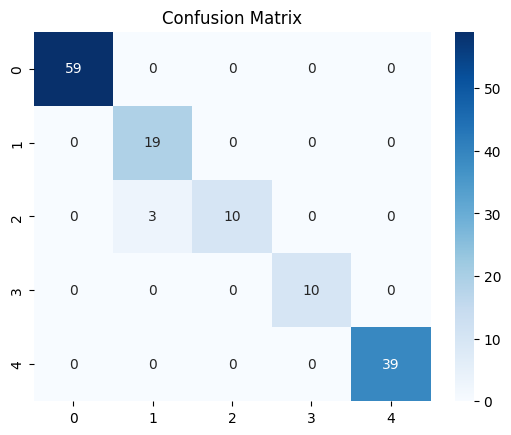

In [53]:
conf_matrix_tree = confusion_matrix(y_test,y_pred_tree)
plt.figure()
sns.heatmap(conf_matrix_tree,cmap='Blues',annot=True)
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Create new data for prediction. Ensure it has the same columns as the training data.
new_data = pd.DataFrame({
    'Age': [30],
    'Sex': ['F'],
    'BP': ['NORMAL'],
    'Cholesterol': ['HIGH'],
    'Na_to_K': [18.5]
})

# Predict with the best RandomForestClassifier model
tree_prediction = grid_search.best_estimator_.predict(new_data)
print(f"RandomForestClassifier predicts: {tree_prediction[0]}")



RandomForestClassifier predicts: DrugY


In [56]:
from sklearn import tree
# Create new data for prediction. Ensure it has the same columns as the training data.
new_data = pd.DataFrame({
    'Age': [30],
    'Sex': ['F'],
    'BP': ['NORMAL'],
    'Cholesterol': ['HIGH'],
    'Na_to_K': [18.5]
})

# Predict with the best RandomForestClassifier model
tree_prediction = grid_search_tree.best_estimator_.predict(new_data)
print(f"Decision tree predicts: {tree_prediction[0]}")

Decision tree predicts: DrugY
